# Scrape data from web

In [8]:
from serpapi import GoogleSearch
import apikey

In [11]:
# Iterate through iphone 11 to 15 and get data from google shopping API
l = []
for name in ["iphone 11", "iphone 12", "iphone 13", "iphone 14", "iphone 15"]:
    params = {
  "engine": "google_shopping",
  "google_domain": "google.com.vn",
  "q": name,
  "hl": "vi",
  "gl": "vn",
  "location": "Vietnam",
  # An attempt to hide my precious secret API key that everyone could have easily gotten for free online
  "api_key": apikey.key
}
    search = GoogleSearch(params)
    results = search.get_dict()
    # Append the data to a list
    l.append(results)

In [34]:
# Save the data to minimize web scraping activities
import pickle
with open('data.pkl', 'wb') as file:
    pickle.dump(l, file)

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Load the data
import pickle
import pandas as pd
with open('data.pkl', 'rb') as file:
    price = pickle.load(file)
    
# Disable scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

E:\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# Group the data of iphone 11-15 to a dataframe
df = pd.DataFrame()
l = []

for x in range(0,5):
    d = pd.DataFrame(price[x]["shopping_results"])
    l.append(d)
df = pd.concat(l)

In [3]:
# Select only the important variables
df1 = df[["title","position","source","extracted_price","rating","reviews","delivery","second_hand_condition"]]

In [4]:
import re

In [5]:
# Define several functions to extract information from product name
def version_conv(title):
    # Define regular expressions
    ###phone_version_pattern = r'\biphone (\d+)\b'
    phone_version_pattern = r'(\d+)'
    
    # Search for matches using the regular expressions
    phone_version_match = re.search(phone_version_pattern, title.lower())

    # Extract the information if it was found
    phone_version = phone_version_match.group(1) if phone_version_match else None
    
    return phone_version

In [6]:
def capa_conv(title):
    # Define regular expressions
    gb_pattern = r'\b(\d+.b)\b'

    # Search for matches using the regular expressions
    gb_match = re.search(gb_pattern, title.lower())

    # Extract the information if it was found
    gb = gb_match.group(1) if gb_match else "unknown"
    return gb

In [7]:
def type_conv(title):
    # Define regular expressions
    ptype_pattern = r'pro max|pro|plus'

    # Search for matches using the regular expressions
    ptype_match = re.search(ptype_pattern, title.lower())

    # Extract the information if it was found
    ptype = ptype_match.group(0) if ptype_match else "normal"
    
    return ptype

In [8]:
def edition_conv(title):
    # Define regular expressions
    edition_pattern = r'(\w+)(?= edition)'

    # Search for matches using the regular expressions
    edition_match = re.search(edition_pattern, title.lower())

    # Extract the information if it was found
    edition = edition_match.group(0) if edition_match else "normal"
    
    return edition

In [9]:
# Create copy of df1
df2 = df1.copy()

# Create "version", "capacity", "type" and "edition" column
df2["version"] = df2["title"].apply(version_conv)
df2["capacity"] = df2["title"].apply(capa_conv)
df2["phone_type"] = df2["title"].apply(type_conv)
df2["edition"] = df2["title"].apply(edition_conv)

In [10]:
# Increase readability
df2["delivery_fee"] = df2["delivery"].apply(lambda x: "free" if "miễn phí" in x else "not free")
df2["second_hand"] = df2["second_hand_condition"].apply(lambda x: "unknown" if pd.isna(x) else "yes")

In [11]:
# Iphone release date
iphone_release = {
    '11': '2019-09-20',
    '12': '2020-10-23',
    '13': '2021-09-14',
    '14': '2022-09-20',
    '15': '2023-09-14'
}

# Create release date column
df2["release"] = df2["version"].map(iphone_release)

# Date of data extraction
df2["data_date"] = "2023-11-09"

# Create day since release column
df2["days_released"] = pd.to_datetime(df2["data_date"]) - pd.to_datetime(df2["release"])

In [12]:
# Create new dataframe
df3 = df2[["title", "position","source","extracted_price","version","capacity"
           ,"phone_type","edition","delivery_fee","second_hand","days_released"]]
df3.head()

,title,position,source,extracted_price,version,capacity,phone_type,edition,delivery_fee,second_hand,days_released
0,iPhone 11 64GB Quốc tế Chính hãng (99%) - xanh,1,Hoàng Hà Mobile,10350000,11,64gb,normal,normal,free,unknown,1511 days
1,iPhone 11 64GB,2,Thế Giới Di Động,10890000,11,64gb,normal,normal,not free,unknown,1511 days
2,【Máy Mới】iPhone 11 64GB Chính Hãng VN/A - Ở Đâ...,3,24hStore,9690000,11,64gb,normal,normal,free,unknown,1511 days
3,【Giá Tốt】 iPhone 11 64GB Quốc Tế - Bảo Hành 12...,4,Phúc Khang Mobile,5450000,11,64gb,normal,normal,free,yes,1511 days
4,【Gía Rẻ Nhất 】IPhone 11 64GB Cũ 95% - Bản Lock...,5,Táo Giá Rẻ,4350000,11,64gb,normal,normal,free,yes,1511 days


# Data exploration

In [13]:
# Check data type and missing values
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 59
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   title            301 non-null    object         
 1   position         301 non-null    int64          
 2   source           301 non-null    object         
 3   extracted_price  301 non-null    int64          
 4   version          301 non-null    object         
 5   capacity         301 non-null    object         
 6   phone_type       301 non-null    object         
 7   edition          301 non-null    object         
 8   delivery_fee     301 non-null    object         
 9   second_hand      301 non-null    object         
 10  days_released    301 non-null    timedelta64[ns]
dtypes: int64(2), object(8), timedelta64[ns](1)
memory usage: 28.2+ KB


I'll tidy up some data types.

In [14]:
# Change "version" to integer
df3["version"] = df3["version"].astype(int)

# Change "days_released" to integer (number of days)
df3["days_released"] = df3["days_released"].dt.days

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
df3.head()

,title,position,source,extracted_price,version,capacity,phone_type,edition,delivery_fee,second_hand,days_released
0,iPhone 11 64GB Quốc tế Chính hãng (99%) - xanh,1,Hoàng Hà Mobile,10350000,11,64gb,normal,normal,free,unknown,1511
1,iPhone 11 64GB,2,Thế Giới Di Động,10890000,11,64gb,normal,normal,not free,unknown,1511
2,【Máy Mới】iPhone 11 64GB Chính Hãng VN/A - Ở Đâ...,3,24hStore,9690000,11,64gb,normal,normal,free,unknown,1511
3,【Giá Tốt】 iPhone 11 64GB Quốc Tế - Bảo Hành 12...,4,Phúc Khang Mobile,5450000,11,64gb,normal,normal,free,yes,1511
4,【Gía Rẻ Nhất 】IPhone 11 64GB Cũ 95% - Bản Lock...,5,Táo Giá Rẻ,4350000,11,64gb,normal,normal,free,yes,1511


In [16]:
# Check data summary
df3.describe(include = "all")

,title,position,source,extracted_price,version,capacity,phone_type,edition,delivery_fee,second_hand,days_released
count,301,301,301,301,301,301,301,301,301,301,301
unique,301,NaN,60,NaN,NaN,7,4,8,2,2,NaN
top,iPhone 11 64GB Quốc tế Chính hãng (99%) - xanh,NaN,24hStore,NaN,NaN,128gb,normal,normal,free,unknown,NaN
freq,1,NaN,17,NaN,NaN,156,224,291,242,203,NaN
mean,NaN,31,NaN,19292443,13,NaN,NaN,NaN,NaN,NaN,778
std,NaN,17,NaN,30153404,1,NaN,NaN,NaN,NaN,NaN,512
min,NaN,1,NaN,1,11,NaN,NaN,NaN,NaN,NaN,56
25%,NaN,16,NaN,8990000,12,NaN,NaN,NaN,NaN,NaN,415
50%,NaN,31,NaN,13599000,13,NaN,NaN,NaN,NaN,NaN,786
75%,NaN,46,NaN,18390000,14,NaN,NaN,NaN,NaN,NaN,1112


The min value of price for an iphone is 1 VND. This is non sensical.

In [17]:
# Investigate
df3[df3["extracted_price"] < 1000000].head()

,title,position,source,extracted_price,version,capacity,phone_type,edition,delivery_fee,second_hand,days_released
8,"iPhone 13 256GB chính hãng, giá tốt nhất T11/2023",9,Điện thoại Vui,1,13,256gb,normal,normal,not free,unknown,786
51,"iPhone 13 512GB chính hãng, thu cũ đổi mới giá rẻ",52,Điện thoại Vui,1,13,512gb,normal,normal,not free,unknown,786
10,iPhone 14 1TB chính hãng (VN/A) | Ưu Đãi Giảm ...,11,Điện thoại Vui,1,14,1tb,normal,normal,not free,unknown,415
23,iPhone 14 128GB chính hãng VN/A - Thu cũ trợ g...,24,Điện thoại Vui,1,14,128gb,normal,normal,not free,unknown,415
33,"iPhone 14 256GB chính hãng | Giá tốt, đặc quyề...",34,Điện thoại Vui,1,14,256gb,normal,normal,not free,unknown,415


Looks like a certain seller is interested in posting ads with unusual prices. In order not to skew the analysis, I'll remove these listings.

In [18]:
# Removal
df3 = df3[df3["extracted_price"] > 1000000]

In [19]:
# Recheck data summary
df3.describe(include = "all")

,title,position,source,extracted_price,version,capacity,phone_type,edition,delivery_fee,second_hand,days_released
count,291,291,291,291,291,291,291,291,291,291,291
unique,291,NaN,60,NaN,NaN,7,4,8,2,2,NaN
top,iPhone 11 64GB Quốc tế Chính hãng (99%) - xanh,NaN,24hStore,NaN,NaN,128gb,normal,normal,free,unknown,NaN
freq,1,NaN,17,NaN,NaN,154,218,281,242,193,NaN
mean,NaN,31,NaN,19955414,13,NaN,NaN,NaN,NaN,NaN,795
std,NaN,17,NaN,30451683,1,NaN,NaN,NaN,NaN,NaN,510
min,NaN,1,NaN,1114492,11,NaN,NaN,NaN,NaN,NaN,56
25%,NaN,16,NaN,9544500,12,NaN,NaN,NaN,NaN,NaN,415
50%,NaN,30,NaN,13790000,13,NaN,NaN,NaN,NaN,NaN,786
75%,NaN,46,NaN,18590000,14,NaN,NaN,NaN,NaN,NaN,1112


# Descriptive analysis

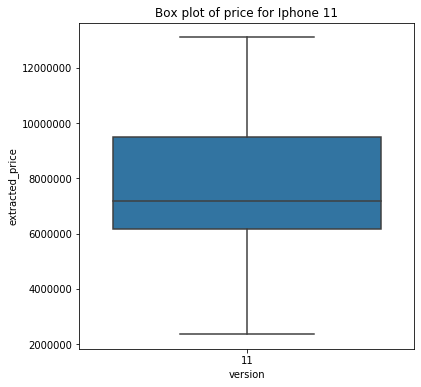

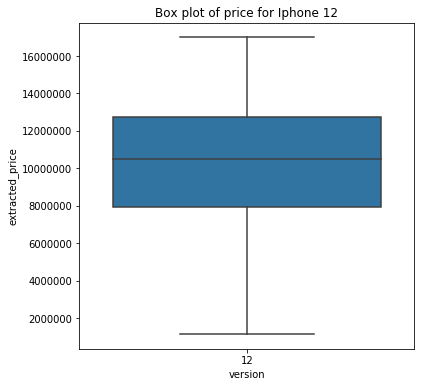

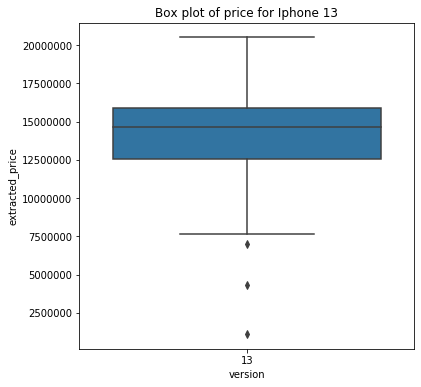

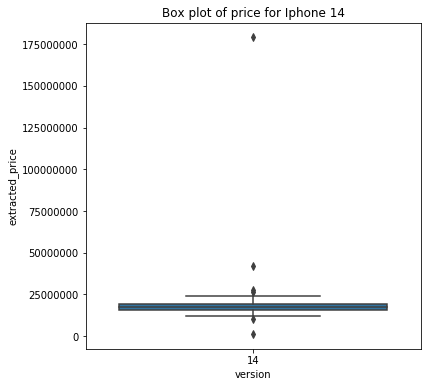

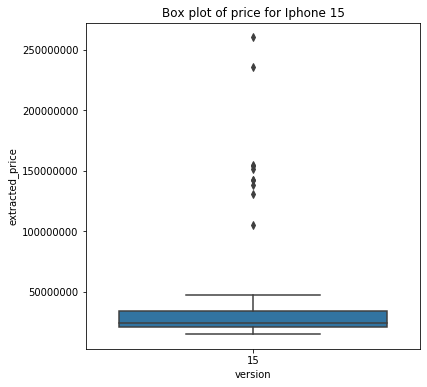

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of iphone price
for ver in range(11,16):
    plt.figure(figsize = (6,6))
    plt.ticklabel_format(style='plain', axis='y')
    sns.boxplot(data = df3[df3["version"] == ver], x = "version", y = "extracted_price")
    plt.title(f"Box plot of price for Iphone {ver}")
    plt.show()

Data of iphone version 11 and 12 is outlier-free. Of iphone 13, some price listings are unsually low, contrary to iphone 15 with lots of extremely high prices.

In [22]:
# Investigate iphone 13
df3[df3["version"] == 13].sort_values("extracted_price").head(7)

,title,position,source,extracted_price,version,capacity,phone_type,edition,delivery_fee,second_hand,days_released
57,Lphon 13 Promax Chính Hãng Điện Thoại Thông Mi...,58,Lazada Vietnam,1114492,13,unknown,pro,normal,free,unknown,786
15,Điện Thoại Apple Iphone 13 Pro Max 1tb (vn/a) ...,16,Viện Máy Tính,4299000,13,1tb,pro max,normal,free,unknown,786
34,[used] Cần Bán IPhone 13 Pro 256GB,35,Chợ Tốt,7000000,13,256gb,pro,normal,free,yes,786
48,Điện Thoại Apple Iphone 13 Pro -Điện Thoại App...,49,Viện Máy Tính,7681000,13,unknown,pro,normal,free,unknown,786
45,iPhone 13 Lock,46,Halo Mobile,9890000,13,unknown,normal,normal,free,yes,786
59,[used] iphone 13 128gb máy quốc tế full chức năng,60,Chợ Tốt,10500000,13,128gb,normal,normal,free,yes,786
3,Điện thoại iPhone 13 128GB – Like New,4,TechOne Hà Nội,10888000,13,128gb,normal,normal,not free,yes,786


Some listings are highly likely to be erroneous. I'll remove them all.

In [23]:
# Remove anamolies of iphone 13 with prices lower than 7.000.000
df3[(df3["version"] == 13)] = df3[(df3["version"] == 13) & (df3["extracted_price"] >= 7000000)]

In [24]:
# Investigate iphone 14
df3[df3["version"] == 14].sort_values("extracted_price").head()

,title,position,source,extracted_price,version,capacity,phone_type,edition,delivery_fee,second_hand,days_released
50,Điện Thoại Thông Minh I14 Pro Max 6.8 Inch Màn...,51,Lazada Vietnam,1300000,14,unknown,pro max,normal,free,unknown,415
28,iPhone 14 Lock,29,Halo Mobile,9990000,14,unknown,normal,normal,free,yes,415
3,Điện thoại iPhone 14 128GB – Like New,4,TechOne Hà Nội,11890000,14,128gb,normal,normal,not free,yes,415
21,IPhone 14 128Gb Cũ - Tím / Xấu 98%,22,Trọng Phú mobile,11990000,14,128gb,normal,normal,free,yes,415
5,【Giá Tốt】 iPhone 14 128GB Quốc Tế - Bảo Hành 1...,6,Phúc Khang Mobile,12750000,14,128gb,normal,normal,free,yes,415


Again, there is 1 instance of anamolous data point. Better catch them all.

In [25]:
# Remove anamolies of iphone 14 with prices lower than 7.000.000
df3[(df3["version"] == 14)] = df3[(df3["version"] == 14) & (df3["extracted_price"] >= 7000000)]

In [26]:
# Investigate iphone 14 again
df3[df3["version"] == 14].sort_values("extracted_price").tail()

,title,position,source,extracted_price,version,capacity,phone_type,edition,delivery_fee,second_hand,days_released
19,iPhone 14 Pro (128GB) - Chính hãng VN/A,20,Hoàng Hà Mobile,23860000,14,128gb,pro,normal,free,unknown,415
9,Apple iPhone 14 Pro Max 128GB Chính hãng VN/A,10,Hoàng Hà Mobile,26400000,14,128gb,pro max,normal,free,unknown,415
47,iPhone 14 Pro 256GB,48,Thế Giới Di Động,27490000,14,256gb,pro,normal,not free,unknown,415
26,iPhone 14 Pro Max 1TB,27,Thế Giới Di Động,41990000,14,1tb,pro max,normal,not free,unknown,415
15,iPhone 14 Pro max bản giới hạn 150 chiếc kỷ ni...,16,HPC Luxury,179000000,14,unknown,pro max,normal,free,unknown,415


There is 1 iphone 14 with extremely high price. However, this is probably not an erroneous data point as the title suggested that this phone is some kind of limited anniversary one. Hence the high price.

In [27]:
# Investigate iphone 15
df3[df3["version"] == 15].sort_values("extracted_price").head()

,title,position,source,extracted_price,version,capacity,phone_type,edition,delivery_fee,second_hand,days_released
41,iPhone 15 Lock,42,Halo Mobile,14990000,15,unknown,normal,normal,free,unknown,56
6,iPhone 15 128GB Chính Hãng 99%,7,Bạch Long Mobile,17990000,15,128gb,normal,normal,free,unknown,56
21,iPhone 15 128GB Chính Hãng Active Online,22,Bạch Long Mobile,18990000,15,128gb,normal,normal,free,unknown,56
15,iPhone 15 VN/A - Yellow,16,Táo Đen Shop,19490000,15,unknown,normal,normal,free,unknown,56
14,iPhone 15 VN/A - Blue,15,Táo Đen Shop,19490000,15,unknown,normal,normal,free,unknown,56


In [28]:
# Investigate iphone 15 again
df3[df3["version"] == 15].sort_values("extracted_price").tail(7)

,title,position,source,extracted_price,version,capacity,phone_type,edition,delivery_fee,second_hand,days_released
28,iPhone 15 Pro Max Ultimate Edition Limited 200...,29,HPC Luxury,142000000,15,512gb,pro max,ultimate,free,unknown,56
19,iPhone 15 Pro Max Pure Gold Edition Limited 39...,20,HPC Luxury,142000000,15,512gb,pro max,gold,free,unknown,56
36,iPhone 15 Pro Max Ultimate Edition Limited 200...,37,HPC Luxury,151000000,15,1tb,pro max,ultimate,free,unknown,56
50,iPhone 15 Pro Max Platinum Edition Limited 99 ...,51,HPC Luxury,154000000,15,512gb,pro max,platinum,free,unknown,56
43,iPhone 15 Pro Max Exotic Edition Limited 99 1Tb,44,HPC Luxury,155000000,15,1tb,pro max,exotic,free,unknown,56
35,iPhone 15 Pro Max LV Edition Limited 1Tb,36,HPC Luxury,236000000,15,1tb,pro max,lv,free,unknown,56
26,iPhone 15 Pro Max LV Dark Night Edition Limite...,27,HPC Luxury,260000000,15,1tb,pro max,night,free,unknown,56


The outliers of iphone 15 also seem to be legitimate. Those phones come from a seller with "luxury" in its name and they all have a specific edition. Since they're not erroneous, it's best to leave them alone.

In [29]:
# Investigate iphone 11
df3[df3["version"] == 11].sort_values("extracted_price").head()

,title,position,source,extracted_price,version,capacity,phone_type,edition,delivery_fee,second_hand,days_released
8,Iphone 11 Pro Max 256gb Trắng ( Ll ) -Iphone 1...,9,Viện Máy Tính,2366000,11,256gb,pro max,normal,free,unknown,1511
4,【Gía Rẻ Nhất 】IPhone 11 64GB Cũ 95% - Bản Lock...,5,Táo Giá Rẻ,4350000,11,64gb,normal,normal,free,yes,1511
21,[used] IPHONE 11 64GB,22,Chợ Tốt,4500000,11,64gb,normal,normal,free,yes,1511
30,[used] iphone 11 64gb Yellow lock Mỹ nguyên bả...,31,Chợ Tốt,4550000,11,64gb,normal,normal,free,yes,1511
9,"iPhone 11 64GB Lock Nhật Mỹ Mới 100%, Giá Rẻ S...",10,Dr Tao Store,4898000,11,64gb,normal,normal,not free,unknown,1511


In [30]:
# Investigate iphone 12
df3[df3["version"] == 12].sort_values("extracted_price").head()

,title,position,source,extracted_price,version,capacity,phone_type,edition,delivery_fee,second_hand,days_released
37,Ip12 Pro Max Di Động Chính Hãng 6.7Inch Điện T...,38,Lazada Vietnam,1144970,12,512gb,pro max,normal,free,unknown,1112
8,IPhone 12 Mini 64Gb Cũ Quốc tế - Đen / Xấu 98%,9,Trọng Phú mobile,5890000,12,64gb,normal,normal,free,yes,1112
19,【Gía Rẻ Nhất 】iPhone 12 64GB Lock Cũ - Hàng Li...,20,Táo Giá Rẻ,6150000,12,64gb,normal,normal,free,yes,1112
3,Điện thoại iPhone 12 64GB – Like New,4,TechOne Hà Nội,6490000,12,64gb,normal,normal,not free,yes,1112
27,iPhone 12 Lock,28,Halo Mobile,6490000,12,unknown,normal,normal,free,yes,1112


In [31]:
# Remove anomalies in iphone 11 and 12
df3[(df3["version"] == 11)] = df3[(df3["version"] == 11) & (df3["extracted_price"] >= 4000000)]
df3[(df3["version"] == 12)] = df3[(df3["version"] == 12) & (df3["extracted_price"] >= 5000000)]

In [32]:
# Remove rows with null
df3 = df3.dropna()

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 59
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            286 non-null    object 
 1   position         286 non-null    float64
 2   source           286 non-null    object 
 3   extracted_price  286 non-null    float64
 4   version          286 non-null    float64
 5   capacity         286 non-null    object 
 6   phone_type       286 non-null    object 
 7   edition          286 non-null    object 
 8   delivery_fee     286 non-null    object 
 9   second_hand      286 non-null    object 
 10  days_released    286 non-null    float64
dtypes: float64(4), object(7)
memory usage: 26.8+ KB


Everything should be good now, hopefully.

In [34]:
# Find median price for different versions
import pandas as pd
df3.groupby("version").agg(median_price = ("extracted_price", "median")).reset_index()

,version,median_price
0,11,7240000
1,12,10590000
2,13,14820000
3,14,17190000
4,15,24390000


If someone wants to buy and Iphone now, they can use the above table as price reference for a "typical" Iphone in the market.

Next, let's analyze online shop visibility and see if a seller has done well in SEO.

In [35]:
# Top 15 positions of iphones
top15 = df3[df3["position"].isin(range(0,16))]

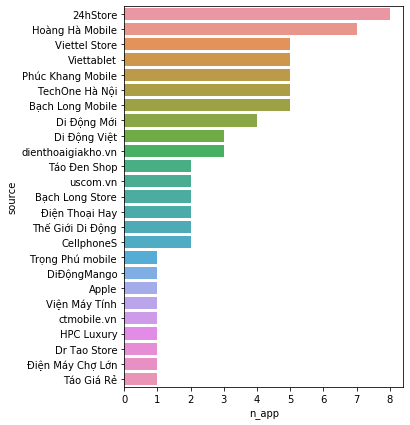

In [36]:
# Number of appearance by seller
visi = top15.groupby("source").agg(n_app = ("source", "count")).reset_index().sort_values("n_app", ascending = False)

# Visualize
plt.figure(figsize = (5,7))
sns.barplot(data = visi, x = "n_app", y = "source")

The top Iphone providers are 24hStore, Hoang Ha Mobile, Viettel Store, Viettablet, Phuc Khang Mobile, TechOne Ha Noi and Bach Long Mobile. 24h stores have a total of 8 times to be visible on the top 15 search results when looking for iphone 11-15.

Let's analyze the percentage of different storage capacity for each version of Iphone.

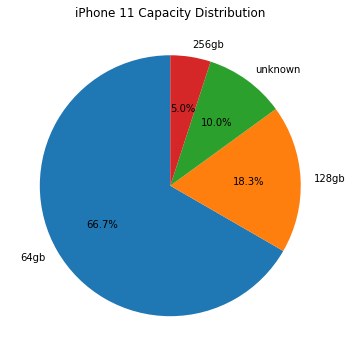

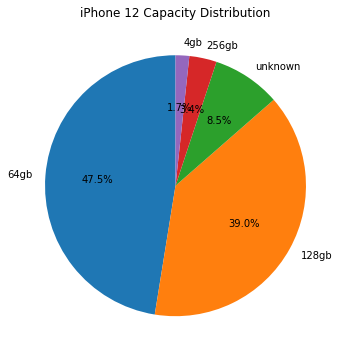

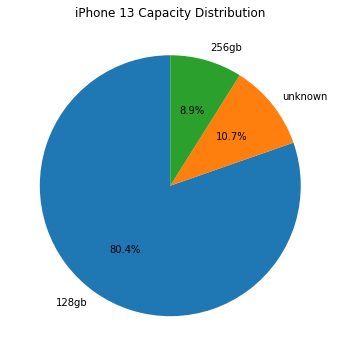

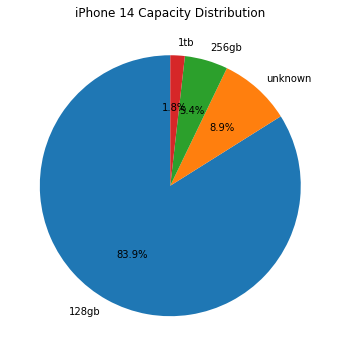

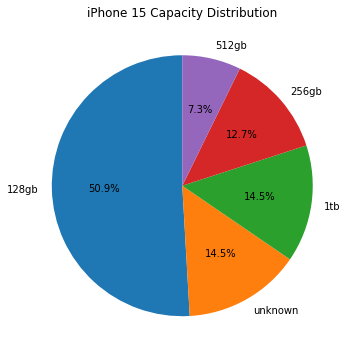

In [37]:
# Draw a pie chart for each version
for version in range(11, 16):
    subset_df = df3[df3['version'] == version]
    
    # Count the occurrences of each capacity
    capacity_counts = subset_df['capacity'].value_counts()
    
    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(capacity_counts, labels=capacity_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'iPhone {version} Capacity Distribution')
    plt.show()

Iphone 11 and 12 mostly have a storage capacity of 64GB, while in version 13, 14 and 15, the majority of phones have 128GB and higher. Technology sure is growing rapidly.

How about phone type?

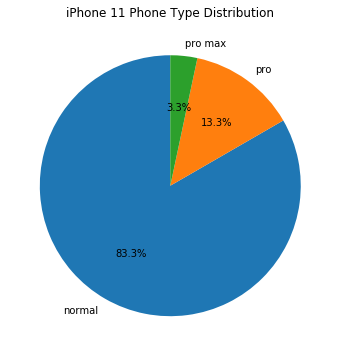

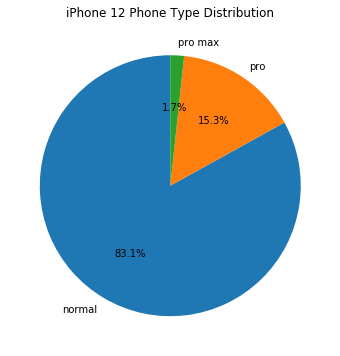

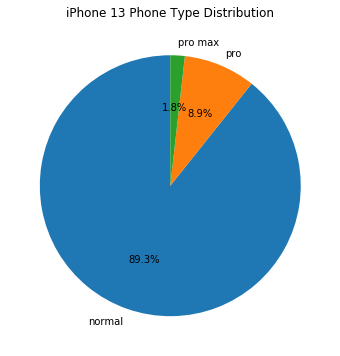

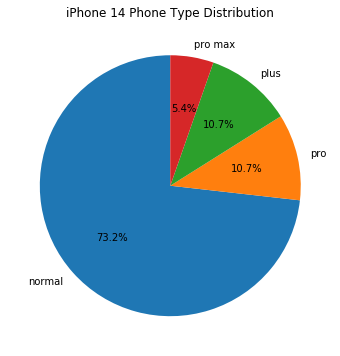

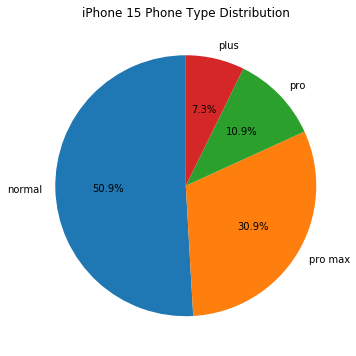

In [38]:
# Draw a pie chart for each version
for version in range(11, 16):
    subset_df = df3[df3['version'] == version]
    
    # Count the occurrences of each capacity
    phone_type_counts = subset_df['phone_type'].value_counts()
    
    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(phone_type_counts, labels=phone_type_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'iPhone {version} Phone Type Distribution')
    plt.show()

Iphone 15 has a very high proportion of pro max type compared to Iphone 11-14. This may be due to larger proportion of promax released, user preference in Viet Nam, phone type availabity of providers, advanced functionality of promax, recent release of promax,... Further analysis is required to understand this trend.

# Machine learning

After analyzing iphone data, I think I might as well build a machine learning model to predict some Iphone prices. You may be wondering what the practical implication of this model is. Don't worry, you're not alone. I'm also having the same question.

### Linear regression

Let's first plug in a simple linear regression model. In this model, I drop the "source", "delivery_fee" and "days_released" columns:
- source: There are too many providers with a small data set, the model may not fit well with too little training data. 
- delivery_fee: With high value products like a smartphone, I don't think delivery fee would affect overall price.
- days_released: This has a high correlation with target variable, multicollinearity awaits.

In [81]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define linear regression formula
formula = 'extracted_price ~ version + C(capacity) + C(phone_type) + C(edition) + C(second_hand)'

# Fit the model
model = ols(formula = formula, data = df3).fit()

# Print the result
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        extracted_price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     157.9
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          7.23e-131
Time:                        20:00:45   Log-Likelihood:                -4984.1
No. Observations:                 286   AIC:                         1.001e+04
Df Residuals:                     267   BIC:                         1.008e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 7.877e+07   1.29e+07      6.105      0.000    5.34e+07    1.04e+08
C(capacity)[T.1tb]        8.131e+06   5.07e+06      1.604      0.110   -1.85e+06    1.81e+07
C(capacity)[T.256gb]     -1.226e+06   2.35e+06     -0.521      0.602   -5.85e+06     3.4e+06
C(capacity)[T.4gb]        2.832e+05   9.35e+06      0.030      0.976   -1.81e+07    1.87e+07
C(capacity)[T.512gb]      6.862e+06   6.67e+06      1.028      0.305   -6.28e+06       2e+07
C(capacity)[T.64gb]       4.746e+05   1.69e+06      0.280      0.780   -2.86e+06    3.81e+06
C(capacity)[T.unknown]    4.376e+06   1.87e+06      2.337      0.020     6.9e+05    8.06e+06
C(phone_type)[T.plus]     1.784e+06   3.08e+06      0.578      0.563   -4.29e+06    7.85e+06
C(phone_type)[T.pro]      3.042e+06   1.75e+06      1.738      0.083   -4.05e+05    6.49e+06
C(phone_type)[T.pro max]  1.919e+07   2.82e+06      6.810      0.000    1.36e+07    2.47e+07
C(edition)[T.gold]       -1.446e+07   1.12e+07     -1.287      0.199   -3.66e+07    7.67e+06
C(edition)[T.lv]            8.1e+07   1.31e+07      6.178      0.000    5.52e+07    1.07e+08
C(edition)[T.night]        1.05e+08   1.31e+07      8.009      0.000    7.92e+07    1.31e+08
C(edition)[T.normal]     -1.061e+08   1.05e+07    -10.115      0.000   -1.27e+08   -8.54e+07
C(edition)[T.platinum]    2.683e+05   1.49e+07      0.018      0.986    -2.9e+07    2.95e+07
C(edition)[T.titanium]       -5e+07   1.31e+07     -3.814      0.000   -7.58e+07   -2.42e+07
C(edition)[T.ultimate]   -7.866e+06   1.19e+07     -0.662      0.509   -3.13e+07    1.55e+07
C(second_hand)[T.yes]    -4.387e+06   1.26e+06     -3.488      0.001   -6.86e+06   -1.91e+06
version                   3.261e+06   5.47e+05      5.964      0.000    2.18e+06    4.34e+06
==============================================================================
Omnibus:                      569.288   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434228.497
Skew:                          12.385   Prob(JB):                         0.00
Kurtosis:                     192.275   Cond. No.                         677.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model performs quite well. With the F score of 157.9 and prob.<0.05, this model is statistically significant, meaning that the feature variables actually have an effect on the target variable, not just by random chance. R score of 91.4% indicates that all features variables are able to explain 91.4% of the change in Iphone price.

Let's dive into linear regression with another approach.

In [102]:
from sklearn.model_selection import train_test_split

# Define feature and target variable
X = df3[['version', 'capacity', "edition",
       'phone_type', 'second_hand']]
y = df3["extracted_price"]

# Create dummy variable for categorical features
X_dum = pd.get_dummies(X, drop_first = True)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = 0.2, random_state = 42)

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('R square:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.8844121778565013
Mean Absolute Error: 3310699.2375120674
Mean Squared Error: 36112865719561.65
Root Mean Squared Error: 6009398.11624772


When applying the model to the test set, the linear regression model still performs well with decent R score. The problem is that the errors are a little high.

To determine what factors contribute the most to the change of Iphone price, we can look into their coefficients.

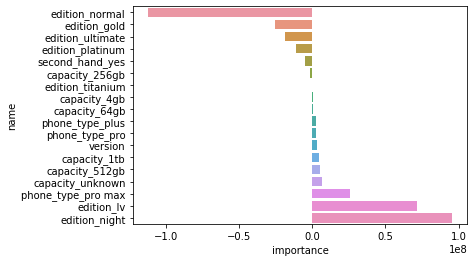

In [85]:
# Check feature importance
fea_imp = pd.DataFrame({"name": X_dum.columns, "importance": model.coef_})
fea_imp = fea_imp.sort_values("importance")

# Visualize
sns.barplot(data = fea_imp, x = "importance", y = "name")

To understand the graph above, we must know what the base of comparison is. For edition, the base is "exotic". For capacity, the base is 128gb. For phone type, the base is "normal". 

What the graph trying to say is:
- With every other features remain the same, a normal Iphone is expected to be about 120 million VND less than an "exotic" edition Iphone.
- With every other features remain the same, a "night" edition Iphone is expected to be about 90 million VND more than an "exotic" edition Iphone.
- With every other features remain the same, an Iphone pro max is expected to be about 25 million VND more than a normal Iphone.

... and so on.

Not every Iphone has various editions like Iphone 15, so finding out that these editions take up a substantial proportion in the change of price for every Iphone is not very meaningful. 

### Decision tree

Let's try another model. 

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [104]:
# Define feature and target variable
X = df3[['version', 'capacity', "edition",
       'phone_type', 'second_hand']]
y = df3["extracted_price"]

# Create dummy variable for categorical features
X_dum = pd.get_dummies(X, drop_first = True)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = 0.2, random_state = 42)

In [105]:
# Build and fit the decision tree
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

# Get the predictions
dt_pred = dt.predict(X_test)

# Evaluate the model
print('R square:', metrics.r2_score(y_test, dt_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))

R square: 0.9699173712703943
Mean Absolute Error: 2054483.2560759052
Mean Squared Error: 9398653869046.693
Root Mean Squared Error: 3065722.405738441


The overall score of this model is very good. However, I'm not very optimistic about this model. With such a small sample, it's quite hard for a machine learning model to split the data effectively. If I set the random_state to another value, the results could be completely different. It's very sad to see your beloved creation perform unreliably.

### Random forest

Lastly, let's move on to random forest model.

In [108]:
from sklearn.ensemble import RandomForestRegressor

# Define feature and target variable
X = df3[['version', 'capacity', "edition",
       'phone_type', 'second_hand']]
y = df3["extracted_price"]

# Create dummy variable for categorical features
X_dum = pd.get_dummies(X, drop_first = True)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = 0.2, random_state = 42)

In [111]:
# Set tuning parameters
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [1,3], 
              'min_samples_split' : [3,5,7],
              'max_features' : ["sqrt",3,5]
}

# Build model
rf = RandomForestRegressor(random_state=0)

# Tune model
rf_cv = GridSearchCV(rf, cv_params, cv = 5, refit='r2')

In [118]:
# Fit model
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [10, 50], 'max_featur

In [117]:
# Predict on test set.
rf_pred = rf_cv.predict(X_test)

# Evaluate the model
print('R square:', metrics.r2_score(y_test, rf_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

R square: 0.9278659153568295
Mean Absolute Error: 2599280.639489737
Mean Squared Error: 22536703817192.12
Root Mean Squared Error: 4747283.835751989


The result of this model is not as good as decision tree. However, given a small sample set, the efficiency of each model in predicting Iphone price is not yet thoroughly examined. So at this point, it's hard to say which model performs the best. For the sake of completeness, let's bring our decision tree to the crown.

# Conclusion

Things I have found out after this project:
- Data from online websites are messy. Although Google did try to standardize data, a long process of cleaning must be done before the data analysis phase.
- Python regular expression has a huge potential in cleaning and processing string datatype.
- In terms of online visibility on Google Shopping, the top Iphone providers in Viet Nam are 24hStore, Hoang Ha Mobile, Viettel Store, Viettablet, Phuc Khang Mobile, TechOne Ha Noi and Bach Long Mobile.
- Iphone 11 and 12 mostly have a storage capacity of 64GB, while in version 13, 14 and 15, the majority of phones have 128GB and higher.
- Iphone 15 has a very high proportion of pro max type compared to Iphone 11-14.

Things I could have done differently:
- Iphone prices change over time. I intended to build a model that could capture the downward price trend and predict its price given a number of days since its release and other factors, e.g. I want to predict the price of an Iphone 16 pro max 256gb right after or a year from its release. However, a large amount of time series data must be collected to achive this goal. A machine learning model would need data from each type of Iphone over a long period of time to accurately predict its price. Unfortunately, I have only collected data from a single day, leading to an unsufficient amout of data to build a model. Ideally, I think collecting data once a month for 3 or 4 years is enough.
- The model itself is not very practical, but it's been fun to build it. Learning how to scrape data from web will probably help me with my career in the future.